# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
#import some necessary librairies
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["dir", "C:/Users/anirb/aiml/UT-Austin-PGP/input/"]).decode("utf8")) #check the files available in the directory

### Load the dataset

In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe
folderPath = 'C:/Users/anirb/aiml/UT-Austin-PGP/Practice-LinearReg'
train = pd.read_csv(folderPath + '/input/boston.csv')
# test = pd.read_csv(folderPath + '/input/test.csv')


### Check the shape of the dataset

In [4]:
train.shape

(506, 13)

### Get the info regarding column datatypes

In [5]:
train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NX         float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

### Get summary statistics for the numerical columns

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.000,3.614,8.602,0.006,0.082,0.257,3.677,88.976
ZN,506.000,11.364,23.322,0.000,0.000,0.000,12.500,100.000
INDUS,506.000,11.137,6.860,0.460,5.190,9.690,18.100,27.740
CHAS,506.000,0.069,0.254,0.000,0.000,0.000,0.000,1.000
NX,506.000,0.555,0.116,0.385,0.449,0.538,0.624,0.871
RM,506.000,6.285,0.703,3.561,5.885,6.208,6.623,8.780
AGE,506.000,68.575,28.149,2.900,45.025,77.500,94.075,100.000
DIS,506.000,3.795,2.106,1.130,2.100,3.207,5.188,12.127
RAD,506.000,9.549,8.707,1.000,4.000,5.000,24.000,24.000
TAX,506.000,408.237,168.537,187.000,279.000,330.000,666.000,711.000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

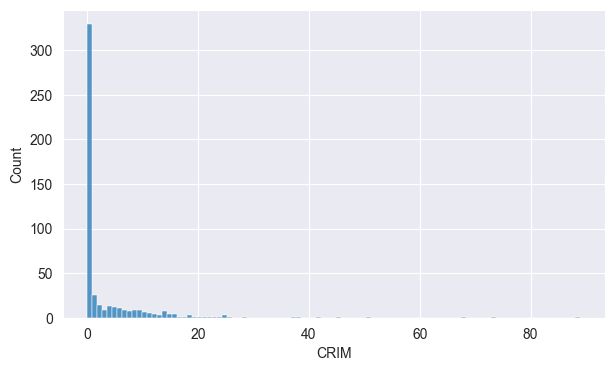

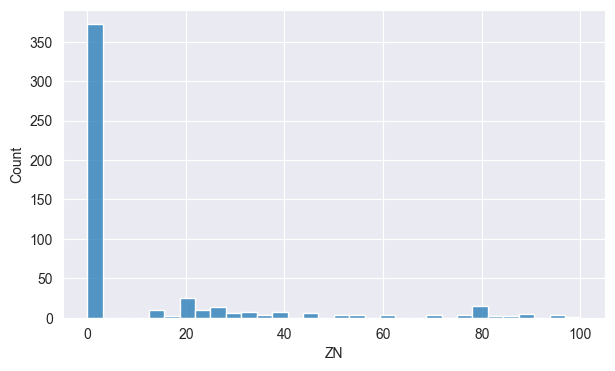

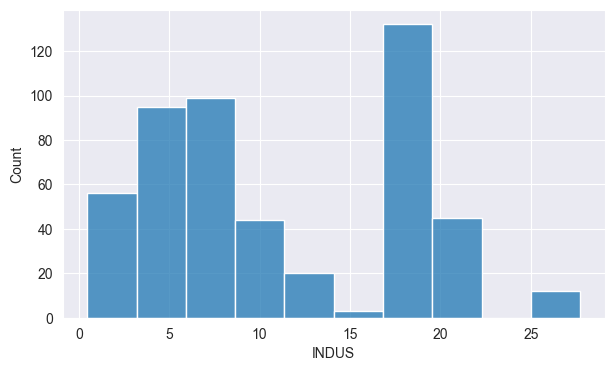

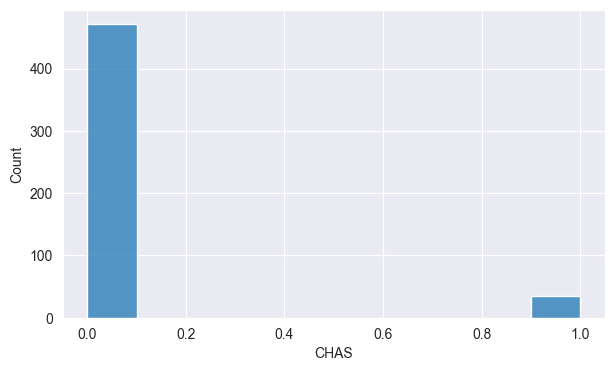

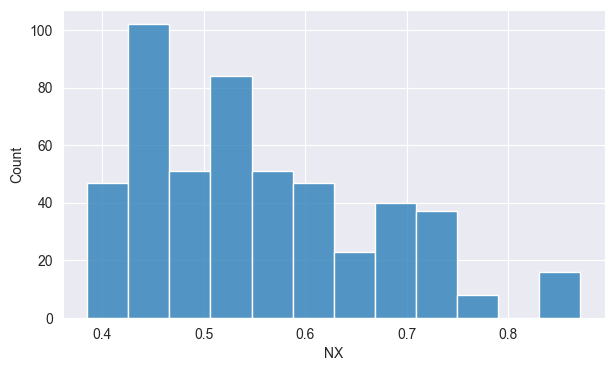

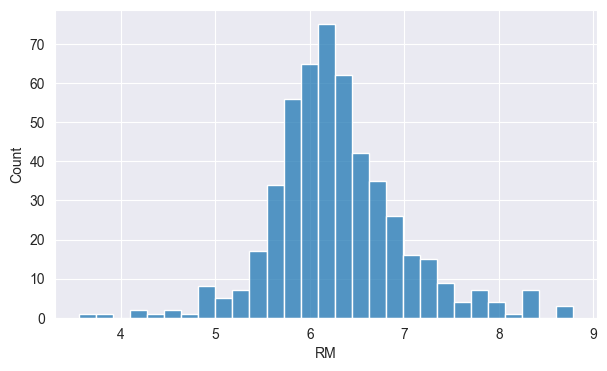

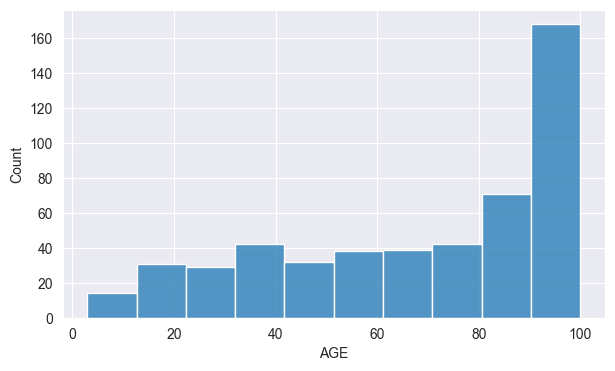

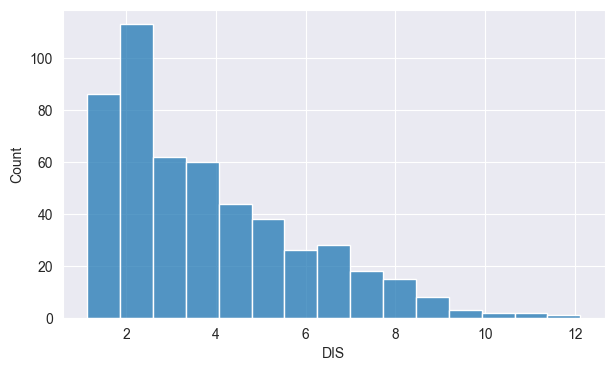

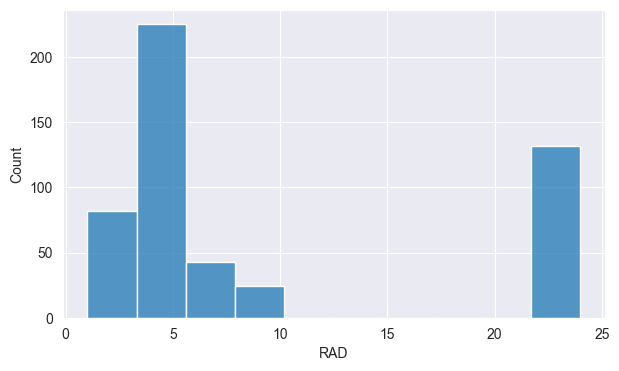

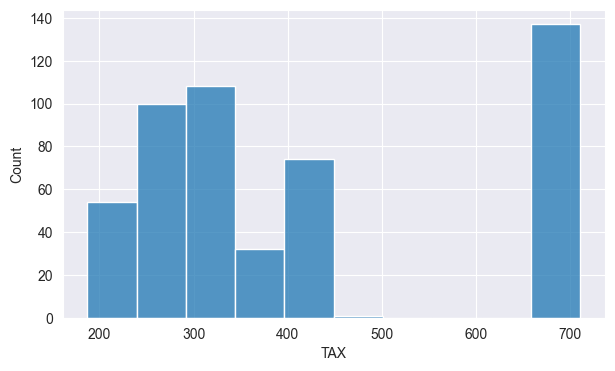

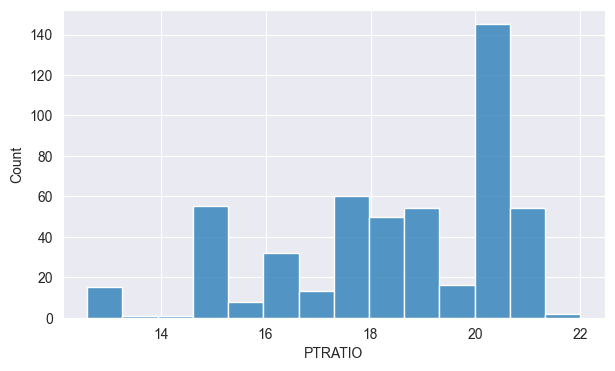

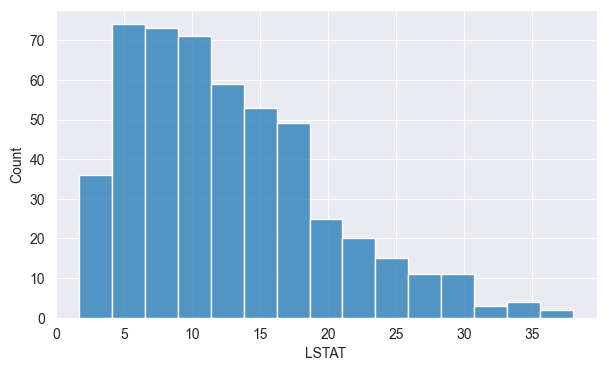

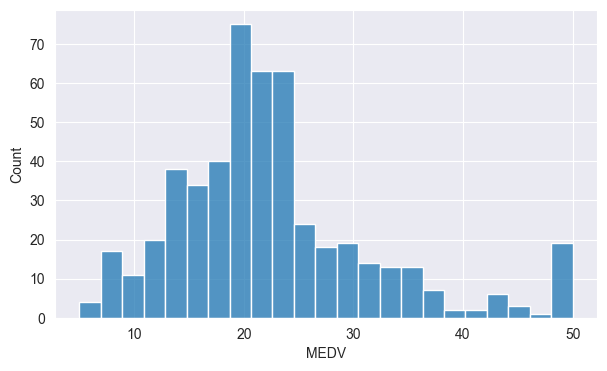

In [8]:
# let's plot all the columns to look at their distributions

import seaborn as sns

for i in train.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=train, x=i)
    plt.show()

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

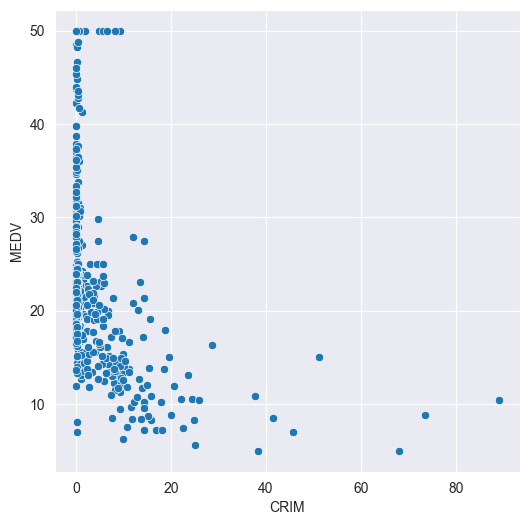

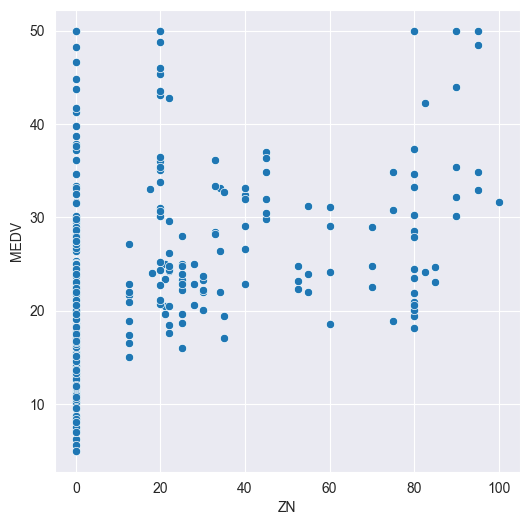

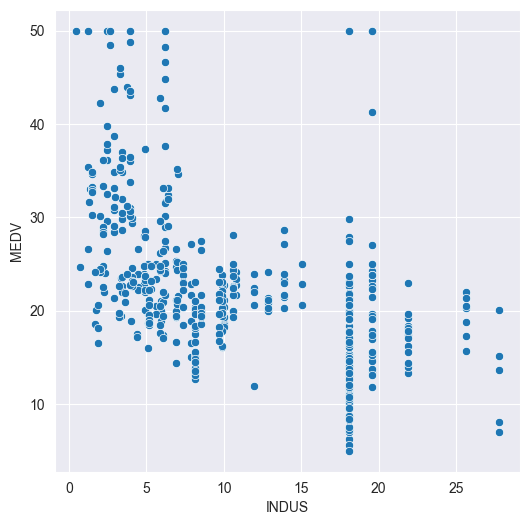

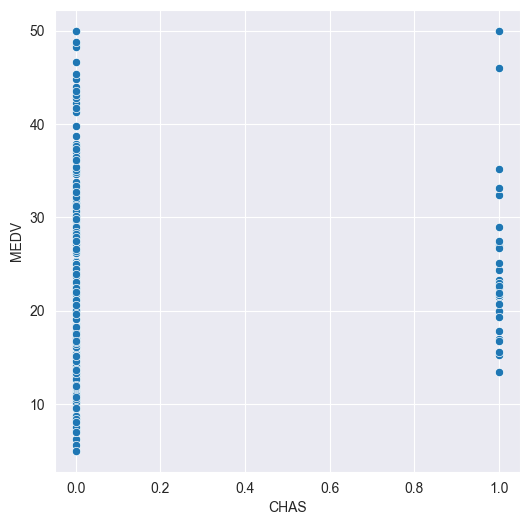

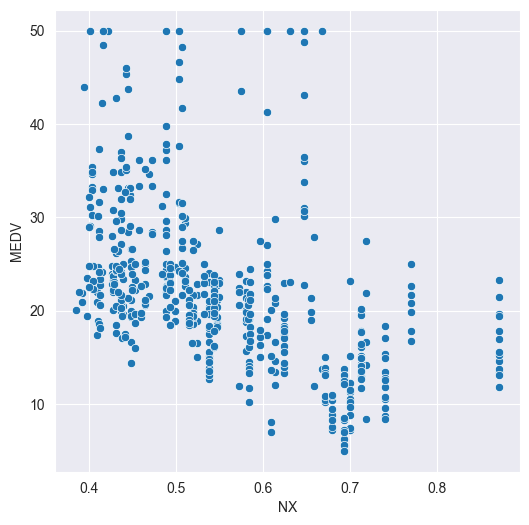

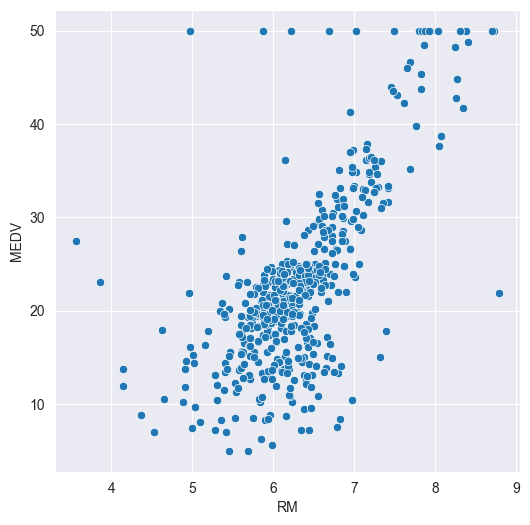

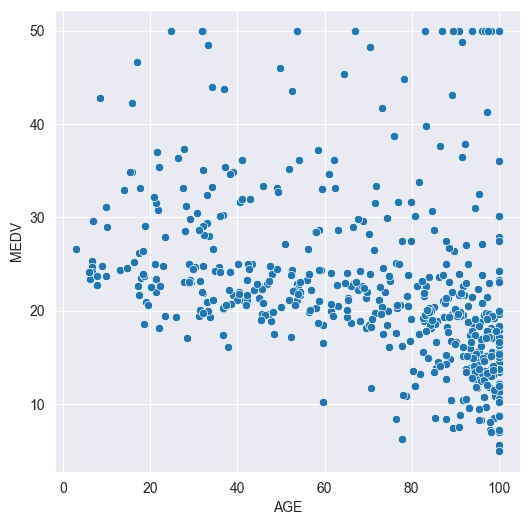

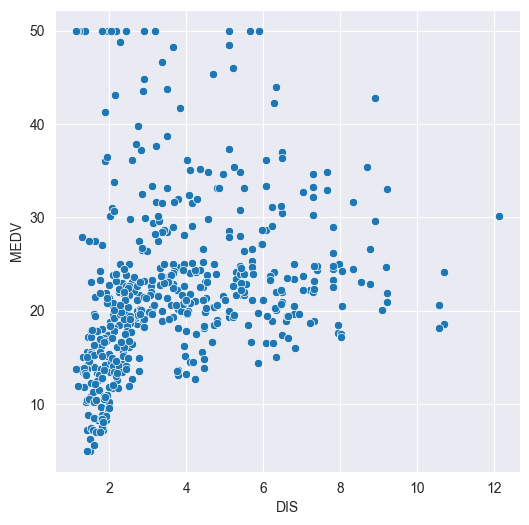

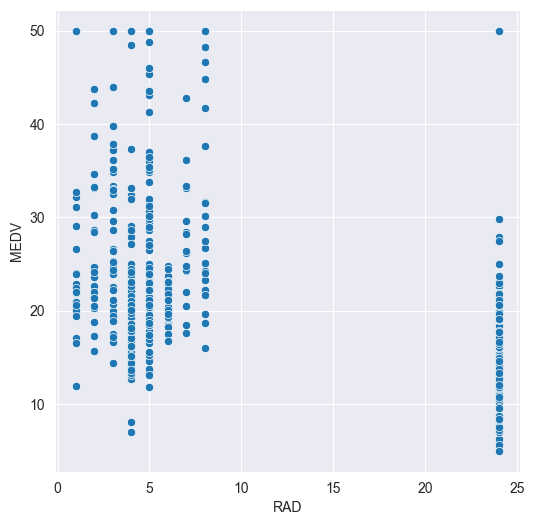

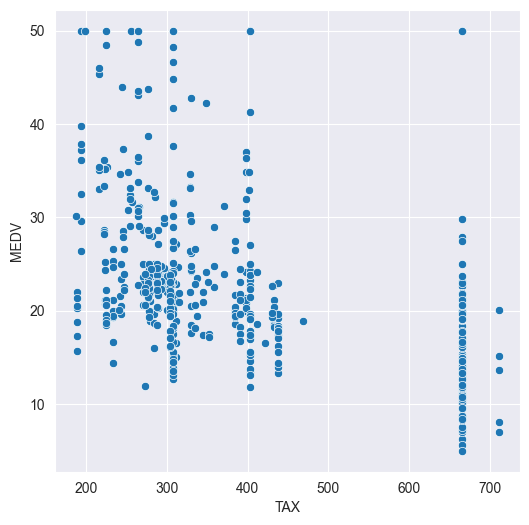

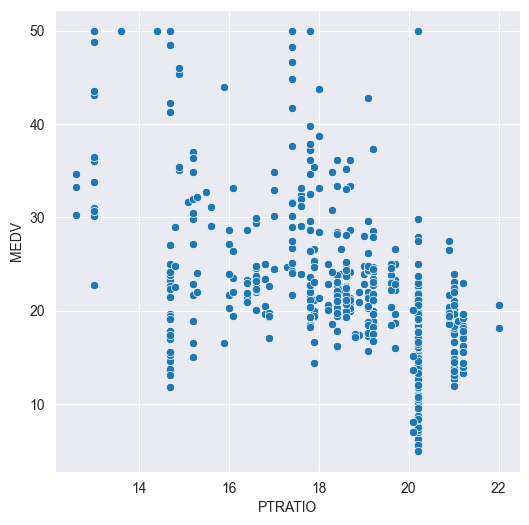

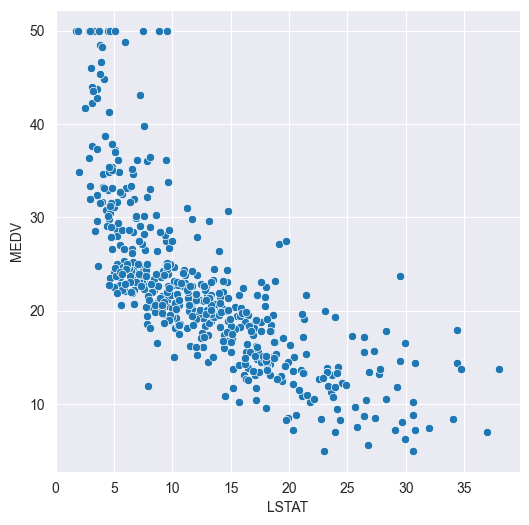

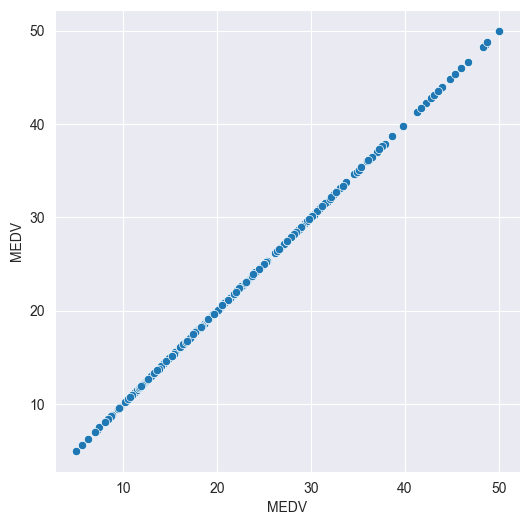

In [9]:
# let's plot the scatterplots of median price with all the features

for i in train.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=train, x=i, y="MEDV")
    plt.show()

**Plot the correlation heatmap and list your observations.**

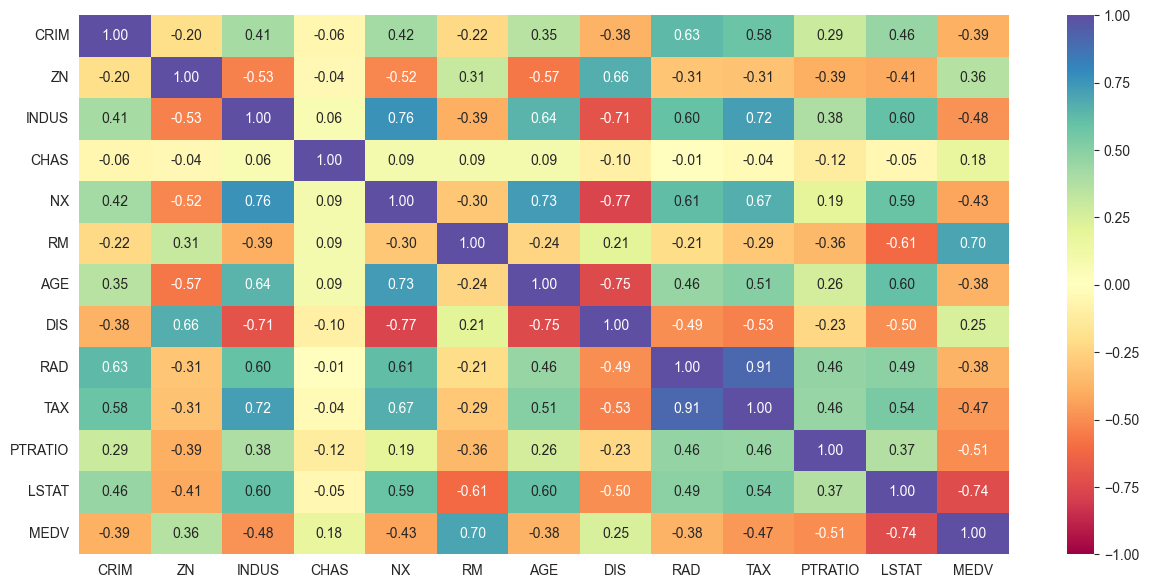

In [10]:
plt.figure(figsize=(15, 7))
sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [11]:
X = train.drop("MEDV", axis=1)
y = train["MEDV"]

In [12]:
# splitting the data in 70:30 ratio for train to test data
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

### Model Building

**Fit the model to the training set**

In [13]:
# intialize the model to be fit and fit the model on the train data
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [14]:
# get the score (R-squared) on the training set

print(
    "The score (R-squared) on the training set is ",
    regression_model.score(X_train, y_train),
)

The score (R-squared) on the training set is  0.7073732058856179


**Write your own function for the R-squared score.**

In [15]:
def r_squared(model, X, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(X)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  8410.365734587129
SST:  28740.928389830508
R-squared:  0.7073732058856179


In [22]:
from sklearn.metrics import mean_squared_error

print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


**Get the score on test set**

In [23]:
# get the score (R-squared) on the test set


print(
    "The score (R-squared) on the test set is ", regression_model.score(X_test, y_test)
)

The score (R-squared) on the test set is  0.7721684899134134


**Get the RMSE on test set**

In [19]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


**Get the model coefficients.**

In [24]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
CRIM,-0.114
ZN,0.061
INDUS,0.054
CHAS,2.518
NX,-22.249
RM,2.698
AGE,0.005
DIS,-1.534
RAD,0.299
TAX,-0.011


**Automate the equation of the fit**

In [25]:
# Let us write the equation of linear regression

Equation = "Price = " + str(regression_model.intercept_)
print(Equation, end=" ")

for i in range(len(X_train.columns)):
    if i != len(X_train.columns) - 1:
        print(
            "+ (",
            regression_model.coef_[i],
            ")*(",
            X_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", regression_model.coef_[i], ")*(", X_train.columns[i], ")")

Price = 49.88523466381727 + ( -0.11384484836914228 )*( CRIM )  + ( 0.06117026804060835 )*( ZN )  + ( 0.05410346495873953 )*( INDUS )  + ( 2.5175119591226496 )*( CHAS )  + ( -22.248502345084386 )*( NX )  + ( 2.6984128200099287 )*( RM )  + ( 0.004836047284751866 )*( AGE )  + ( -1.534295381999265 )*( DIS )  + ( 0.2988332548590178 )*( RAD )  + ( -0.011413580552025099 )*( TAX )  + ( -0.9889146257039405 )*( PTRATIO )  + ( -0.5861328508499077 )*( LSTAT )
